# Data Storytelling

This project will showcase the ability to use story telling to craft a narrative from data and its subsequent analysis. Through this project we will learn to ask questions and explore our data, identify trends within the data, and use analysis and visualizations to communicate our findings. 

## Introduction

Starbucks is an American cafe chain that spans the globe. Serving both coffee and tea, many people around the world start their day with a beverage from the cafe to get their morning dose of caffeine. That being said, many of those same people are divided in how they like their beverage prepared. Some swear by the strong caffeine content found in coffee whereas other claim that tea performs just as well if not better. Some prefer their coffee au naturale - without any cream or sugar - while others like their coffee dolled up with various syrups, milks, and even with infused and carbonated with nitrogen. Using the nutritional breakdown of the Starbucks menu, we find the answer to this question.

### Problem: What is the best way to intake caffeine at Starbucks?

## Import Necessary Packages: 

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

## Load the Data:

In [161]:
drinkmenu = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [195]:
drinkmenu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0


In [163]:
drinkmenu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [164]:
drinkmenu.shape

(242, 18)

## Cleaning the Data:

In [165]:
# we can see that some of the columns have a leading/trailing space in the name, let's fix that
drinkmenu.columns

cols = list(drinkmenu.columns)
new_cols = [x.lstrip(" ") for x in cols]
new_cols = [x.rstrip(" ") for x in new_cols]

col_names = {key: value for key, value in zip(cols, new_cols)}

drinkmenu = drinkmenu.rename(columns = col_names)
drinkmenu.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [166]:
# we can also see that three of the string columns are listed as "object" 
# lets find out why and then change them to strings

# we can see that some of the values within this column have a symbol 
drinkmenu['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [167]:
# lets get rid of the symbol and then cast the column to a string
drinkmenu['Beverage_category'] = drinkmenu['Beverage_category'].map(lambda x: x.replace("®", ""))

# let's check to see that the symbol is gone
drinkmenu['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino Blended Coffee', 'Frappuccino Light Blended Coffee',
       'Frappuccino Blended Crème'], dtype=object)

In [168]:
# cast the column to a string
drinkmenu = drinkmenu.astype({'Beverage_category': 'string'})

# check to see that the column is now a string
drinkmenu.dtypes

Beverage_category           string
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)               object
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)               object
dtype: object

In [169]:
drinkmenu['Beverage'].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [170]:
drinkmenu['Beverage_prep'].unique()

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [171]:
# lets change the other columns from object to string as well
drinkmenu = drinkmenu.astype({'Beverage': 'string', 'Beverage_prep': 'string'})
drinkmenu.dtypes

Beverage_category           string
Beverage                    string
Beverage_prep               string
Calories                     int64
Total Fat (g)               object
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)               object
dtype: object

In [172]:
# let's change other columns to their appropriate type as well
drinkmenu['Total Fat (g)'] = drinkmenu['Total Fat (g)'].replace('3 2', '3.2')
drinkmenu['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3.2'], dtype=object)

In [173]:
drinkmenu = drinkmenu.astype({'Total Fat (g)': 'float'})
drinkmenu.dtypes

Beverage_category           string
Beverage                    string
Beverage_prep               string
Calories                     int64
Total Fat (g)              float64
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)               object
dtype: object

In [174]:
selection = drinkmenu.iloc[:, 13:]
cols = list(selection.columns)
cols.remove('Caffeine (mg)')
print(cols)

['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']


In [175]:
for col in cols:
    drinkmenu[col] = drinkmenu[col].str[:-1]

In [176]:
drinkmenu['Vitamin A (% DV)'].unique()

array(['0', '10', '6', '15', '20', '30', '25', '8', '4', '2', '50'],
      dtype=object)

In [177]:
drinkmenu['Vitamin C (% DV)'].unique()

array(['0', '2', '4', '6', '10', '15', '20', '80', '100', '8'],
      dtype=object)

In [178]:
drinkmenu['Calcium (% DV)'].unique()

array(['0', '2', '20', '30', '40', '50', '15', '25', '35', '45', '10',
       '60', '6', '8'], dtype=object)

In [179]:
drinkmenu['Iron (% DV)'].unique()

array(['0', '8', '15', '25', '10', '20', '30', '40', '50', '6', '2', '4',
       '0.00', '6.00', '8.00', '10.00', '15.00', '35'], dtype=object)

In [180]:
# we can see that the caffeine column has multiple values within it. Lets fix this
drinkmenu['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [181]:
# we can assume that an 'na' value in the coffeine column means that there is no caffeine present in the drink
drinkmenu['Caffeine (mg)'] = drinkmenu['Caffeine (mg)'].fillna('0')
drinkmenu['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [182]:
# Since the main information we would need for this analysis is the caffeine column, we need concrete numbers to work with
# Therefore, we will eliminate any rows with empty values and varying inputs since we cannot assume anything about them from the dataset.

drinkmenu = drinkmenu.drop(drinkmenu[(drinkmenu['Caffeine (mg)'] == '') | (drinkmenu['Caffeine (mg)'] == 'Varies') | (drinkmenu['Caffeine (mg)'] == 'varies')].index)

In [183]:
drinkmenu['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', '50', '70', '120', '55', '80',
       '110', '165', '235', '90', '125', '170', '15', '130', '140', '100',
       '145', '65', '105'], dtype=object)

In [184]:
cols.append('Caffeine (mg)')

In [185]:
# now that we've fixed the caffeine column, we can now change all the columns to their correct data types
dictionary = {key: 'float' for key in cols}
drinkmenu = drinkmenu.astype(dictionary)
drinkmenu.dtypes

Beverage_category           string
Beverage                    string
Beverage_prep               string
Calories                     int64
Total Fat (g)              float64
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)           float64
Vitamin C (% DV)           float64
Calcium (% DV)             float64
Iron (% DV)                float64
Caffeine (mg)              float64
dtype: object

## Exploratory Data Analysis:

Now that our data is clean, we can finally begin with our analysis and find out what is truly the best way to get your morning dose of caffeine!

In [186]:
# lets first understand how the drinks are grouped
drinkmenu['Beverage_category'].unique()

<StringArray>
[                          'Coffee',          'Classic Espresso Drinks',
        'Signature Espresso Drinks',                  'Tazo Tea Drinks',
            'Shaken Iced Beverages',                        'Smoothies',
       'Frappuccino Blended Coffee', 'Frappuccino Light Blended Coffee',
        'Frappuccino Blended Crème']
Length: 9, dtype: string

Text(0.5, 0, 'Beverage Category')

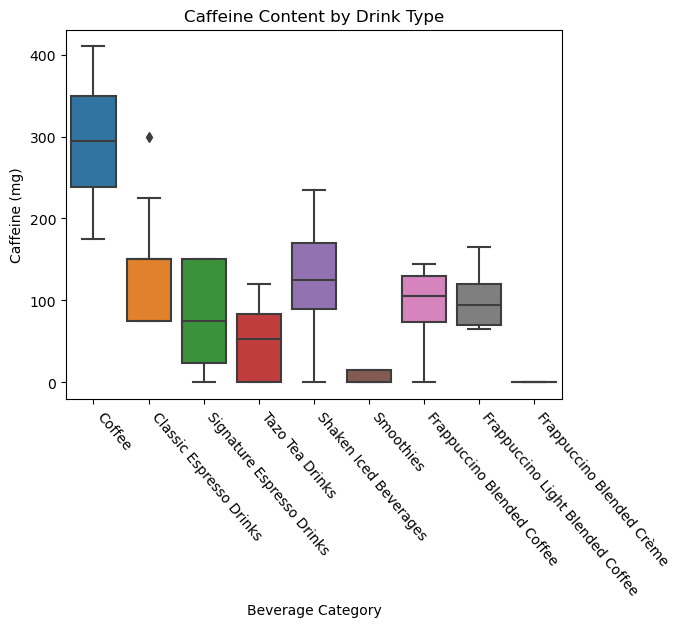

In [187]:
# let's graph the caffeine content by beverage type
_ = sns.boxplot(data=drinkmenu, x = 'Beverage_category', y = 'Caffeine (mg)')
plt.xticks(rotation=-50, ha='left') 
plt.title('Caffeine Content by Drink Type')
plt.xlabel('Beverage Category')

From this graph, we can see that there is a pretty clear distinction between the caffeine content found in pure coffee drinks as opposed to other types. That being said, it is interesting to note that if we ignore the superior caffeine content of Coffee drinks, there is not a clear significant difference in the caffeine content amongst the various drink types offered at Starbucks. While we can say that although (Tazo) tea drinks at Starbucks have the 3rd lowest median caffeine content, there is not enough of a distinction between the caffeine content found in tea drinks vs coffee containing drinks at Starbucks to settle the debate between tea and coffee.

With regards to our original question, if we frame it to figure out which drink category has the highest caffeine content, we have a clear winner - coffee drinks. However, what constitutes a coffee drink and how much of their menu is represented by this category?

In [196]:
coffee_drinks = drinkmenu[drinkmenu['Beverage_category'] == 'Coffee']
len(coffee_drinks)

4

As you can see, there are only 4 coffee drinks on the Starbucks menu. These drinks are purely coffee, no cream or sugar. As such, we can also expect that it would have some of the highest caffeine content since it is entirely coffee. However, since it only accounts for 4 drinks out of 185 drinks that comprise the Starbucks drink menu it would be a bit boring to announce it the winner and call it quits here.

In [197]:
coffee_drinks

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0


In [189]:
drinkmenu2= drinkmenu[drinkmenu['Beverage_category'] != 'Coffee']

That being said, if we take a closer look at the graph above (ignoring the coffee drinks) there is no statisically significant difference between the caffeine content found in their coffee-containing drinks (ie. espresso drinks and frappucinos). Therefore, we need to dig deeper.

### What is the most calorie efficient way to consume caffeine? What is the correlation between caffeine content and caloric value?

Text(0.5, 0, 'Beverage Category')

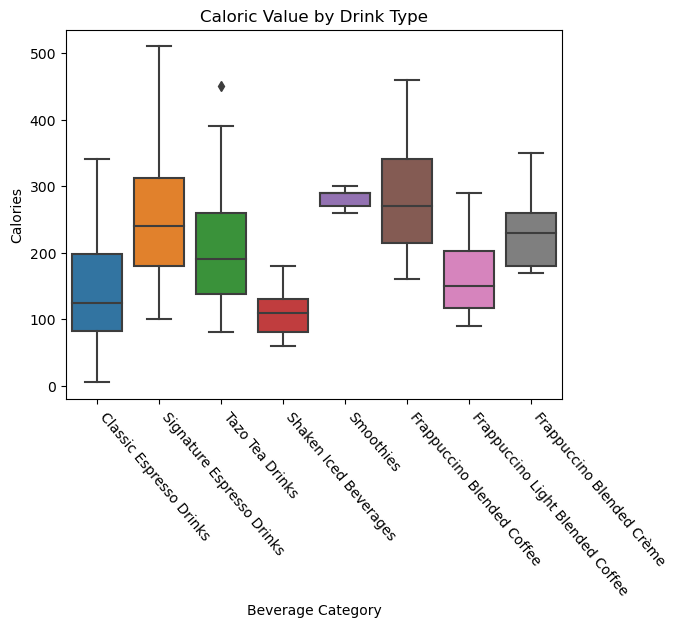

In [190]:
# lets first try to see how the different drinks compare calorie-wise
sns.boxplot(data=drinkmenu2, x = 'Beverage_category', y = 'Calories')
plt.xticks(rotation=-50, ha='left') 
plt.title('Caloric Value by Drink Type')
plt.xlabel('Beverage Category')

Text(0.5, 1.0, 'Caloric Value vs Caffeine Content (mg)')

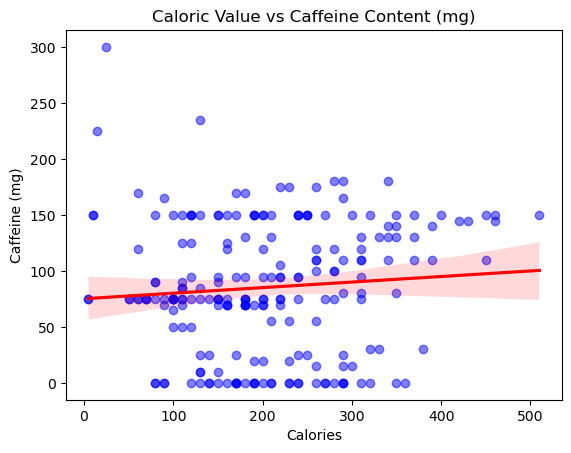

In [201]:
# Let's then visualize the general trend behind calories and caffeine content
sns.regplot(data=drinkmenu2, x = 'Calories', y = 'Caffeine (mg)', scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.title('Caloric Value vs Caffeine Content (mg)')

Text(0.5, 1.0, 'Caloric Value vs Caffeine Content (mg)')

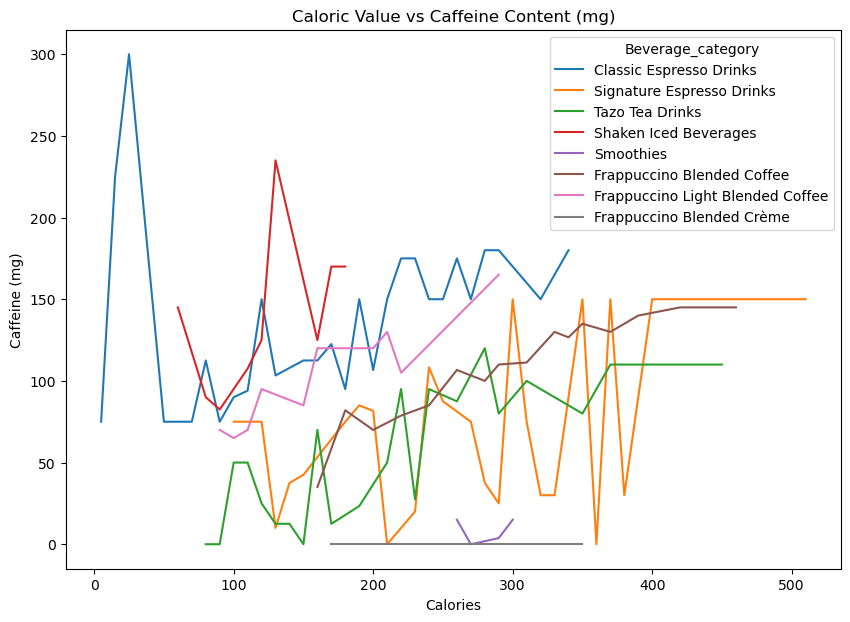

In [194]:
# What happens if we separate them accoring to our categories?
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=drinkmenu2, x = 'Calories', y = 'Caffeine (mg)', hue='Beverage_category', ci = None)
ax.set_title('Caloric Value vs Caffeine Content (mg)')

In [193]:
max_caff = drinkmenu2['Caffeine (mg)'].idxmax()
max_caff = drinkmenu2.loc[max_caff, :]
max_caff

Beverage_category          Classic Espresso Drinks
Beverage                           Caffè Americano
Beverage_prep                                Venti
Calories                                        25
Total Fat (g)                                  0.0
Trans Fat (g)                                  0.0
Saturated Fat (g)                              0.0
Sodium (mg)                                      0
Total Carbohydrates (g)                         15
Cholesterol (mg)                                 4
Dietary Fibre (g)                                0
Sugars (g)                                       0
Protein (g)                                    1.0
Vitamin A (% DV)                               0.0
Vitamin C (% DV)                               0.0
Calcium (% DV)                                 2.0
Iron (% DV)                                    0.0
Caffeine (mg)                                300.0
Name: 43, dtype: object

As we can see, we have a clear winner when it comes to the drink that offers the most caffeine for the least amount of calories - the Venti Caffè Americano. With just 25 calories this drink packs a whopping 300mg of caffeine, which is already 75% of the daily recommended caffeine intake amount. 

In [214]:
# Finally, lets graph the caffeine-calorie ratios of each drink category to determine which drink categories are more efficient.
drinkmenu['caffeine_calorie_ratio'] = drinkmenu['Caffeine (mg)'] / drinkmenu['Calories']
drinkmenu2['caffeine_calorie_ratio'] = drinkmenu2['Caffeine (mg)'] / drinkmenu2['Calories']

C:\Users\Edwin\AppData\Local\Temp\ipykernel_13396\3509423182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drinkmenu2['caffeine_calorie_ratio'] = drinkmenu2['Caffeine (mg)'] / drinkmenu2['Calories']


Text(0.5, 0, 'Beverage Category')

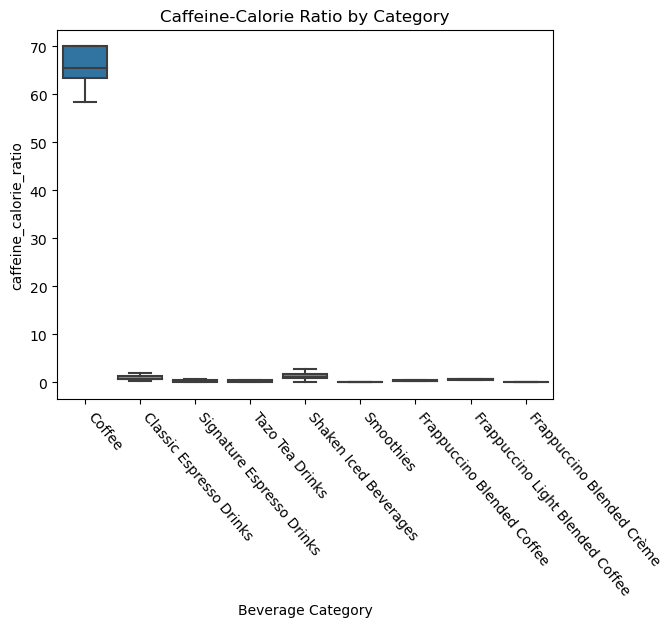

In [213]:
sns.boxplot(data=drinkmenu, x = 'Beverage_category', y = 'caffeine_calorie_ratio', showfliers=False)
plt.xticks(rotation=-50, ha='left') 
plt.title('Caffeine-Calorie Ratio by Category')
plt.xlabel('Beverage Category')

As we can see, we were correct in ignoring the Coffee category because it is so dominant in terms of caffeine-calorie efficiency. Let's regraph the categories while ignoring Coffee.

Text(0.5, 0, 'Beverage Category')

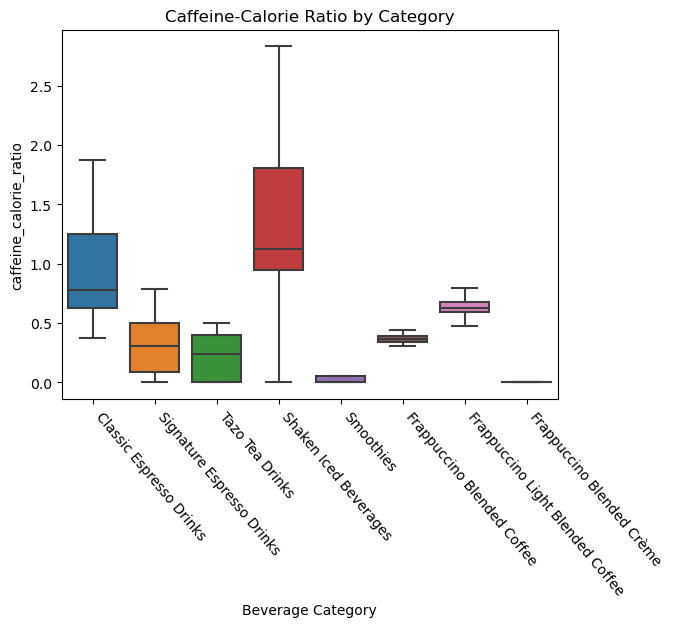

In [216]:
sns.boxplot(data=drinkmenu2, x = 'Beverage_category', y = 'caffeine_calorie_ratio', showfliers=False)
plt.xticks(rotation=-50, ha='left') 
plt.title('Caffeine-Calorie Ratio by Category')
plt.xlabel('Beverage Category')

# Conclusions:

From our analysis upon the Starbucks drink menu, we can confidently conclude two things. One, that when it comes to high caffein content drinks, nothing beats an old fashioned cup of joe. The coffee (not coffee drinks) at Starbucks is a clear winner when it comes to caffeine content - containing a significantly different and higher amount of caffeine than any other drink category at the cafe. Second, of all the drinks at Starbucks (ignoring the 4 pure coffee beverages), the Venti Caffè Americano is the most caffeine efficient drink (calorie-wise) at Starbucks. 

As for the correlation between caffeine and calorie count, we were able to see a slight positive trend between the two variables - however, this is to be expected as increasing the amount of drink will increase both caffeine content and calorie count. Therefore, we are unable to claim that there exists a significant trend of any kind between calorie count and caffeine content. 

Finally, while we noticed that there was not a significant difference between calorie counts amongst drink categories, we were able to see that there is some discernable difference in the ratios of caffeine to calories amongst drink categories. While purely coffee drinks dominated this metric (as we expected) we can see that shaken iced beverages and classic espresso drinks stood out amongst the rest of the categories, offering statistically significantly more miligrams of caffeine per calorie in their drinks. 

# Further Questions:

As for further questions that we could ask about this, I believe that price would be a very interesting factor to see in this dataset. While we investigated the dietary aspect of this question, I believe that adding a price dimension would be very useful to consumers as well. Since so many people around the world consider coffee such a necessary regular - if not daily - expense, it would be interesting to see what is the most price efficient way to caffeinate at Starbucks - and even what the worst is. It would also be interesting to see as well what other metrics correlate with price and if certain measures would correlate the way we expect them to with price.